In [62]:
# Create random number of points of the Gaussian component to be generated from it

import random

def random_with_sum(n, total):
    dividers = sorted(random.sample(range(1, total), n - 1))
    return [a - b for a, b in zip(dividers + [total], [0] + dividers)]

z1 = random_with_sum(5, 100)
z2 = random_with_sum(5, 100)

print('z1 =', z1)
print('z2 =', z2)

z1 = [5, 5, 19, 61, 10]
z2 = [11, 30, 29, 24, 6]


In [63]:
# Create random of means of the Gaussian component of two Mixture Gaussian

mean1 = []
mean2 = []

for i in range(5):
    mean1.append(round(random.uniform(-1, 0), 1))
    mean2.append(round(random.uniform(0, 1), 1))
    
print('mean1 =', mean1)
print('mean2 =', mean2)

mean1 = [-0.0, -0.4, -0.6, -0.9, -0.3]
mean2 = [0.2, 0.0, 0.6, 1.0, 0.8]


In [64]:
# Create data set from two Mixture Gaussian

import numpy as np

x1 = np.empty((0, 0))
x2 = np.empty((0, 0))
y1 = np.empty((0, 0))
y2 = np.empty((0, 0))
for i in range(5):
    x1 = np.append(x1, np.random.normal(mean1[i], 1, z1[i]))
    y1 = np.append(y1, np.random.normal(mean1[i], 1, z1[i]))
    x2 = np.append(x2, np.random.normal(mean2[i], 1, z2[i]))
    y2 = np.append(y2, np.random.normal(mean2[i], 1, z2[i]))

print('x1 =', x1)
print('y1 =', y1)
print('x2 =', x2)
print('y2 =', y2)

x1 = [-1.8581483   1.44496218  0.9354667   0.4092167   1.13014844 -0.43839967
 -0.41425809 -0.75071931 -1.38194703 -0.87343587  0.1449718   0.48208544
 -1.15596605 -0.86470829 -1.57027552 -0.57584046 -0.29643885 -1.99964816
 -1.04014473 -0.75699702 -0.94080671 -0.72891281 -0.88792183 -1.99746983
  0.44259906 -0.43443681 -0.56090053 -1.44271193 -0.4406339  -1.86707323
 -2.14431341 -2.24175211 -1.49895497  0.37193409 -0.94261178  0.89314703
  0.22960116 -0.35792956 -1.29854675 -2.28563321 -0.5761845  -0.60894141
 -1.08622484  1.14163462 -0.84116563 -1.09208347 -1.12153858 -1.29857953
 -2.02562775 -0.07207711 -0.57600576 -0.9436535  -1.14894492  0.35051865
 -1.00137423 -0.47068527 -1.14412868 -0.99752062  0.80605341 -0.47944065
 -1.74185372  0.02266254 -2.16404876 -2.64148508 -0.87059867 -1.18756293
 -0.40340003 -1.13161776 -1.73367603 -1.40015479  0.01553386 -0.38195463
 -1.32966162 -0.74503814  0.64402178 -0.72832656 -0.6082378   0.04365758
 -0.81775096 -1.98377344 -0.56601583 -3.655577

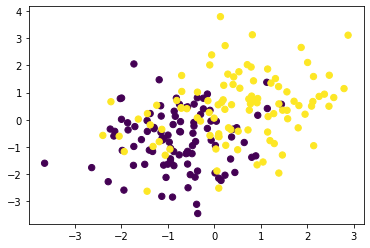

In [95]:
# Plot data

import matplotlib.pyplot as plt

X = []
y = []

for i in range(len(x1)):
    X.append([x1[i], y1[i]])
    y.append(1)
for i in range(len(x2)):
    X.append([x2[i], y2[i]])
    y.append(2)
    
X = np.asarray(X)
labels = np.asarray(y)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')


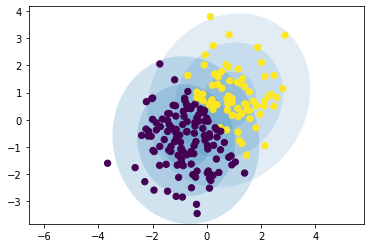

In [96]:
# Draw GMM boundary

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2)
plot_gmm(gmm, X)